## Motivation

### What is your dataset?
Our main dataset is called MovieLens Dataset (consists of movies released on or before July 2017). It's 33 MB, including 45572 rows (That is to say, it includes data for a total of 45,572 movies), 24 variables. We also introduce several other related dataset like rating, keywords and credits for reference. The total size of all data is approximately 900 MB.


### Why did you choose this/these particular dataset(s)?
The history of the film industry dates back to the late 19th century when it emerged as a novel form of artistic expression. The Lumière Brothers' commercial film screening in Paris in 1895 marked the beginning of commercialization in cinema. Over the decades, the industry evolved through silent films, the advent of sound in the late 1920s, and the introduction of color in the 1930s, culminating in the digital revolution of the late 20th and early 21st centuries.

The silent film era, from the late 1890s to the early 1920s, saw the emergence of iconic works such as "The Great Train Robbery" and "Metropolis," laying the foundation for cinematic language and storytelling techniques. The transition to sound films revolutionized the medium, with classics like "Gone with the Wind" and "The Wizard of Oz" showcasing the power of dialogue and sound effects to enhance storytelling. The subsequent adoption of color further enriched cinematic expression, with films like "The Wizard of Oz" and "Citizen Kane" showcasing the vibrant possibilities of color cinematography.

With the advent of digital technology, the film industry underwent a seismic shift, enabling unprecedented creativity in visual effects and post-production. From blockbusters like "Titanic" and "Avatar" to independent gems like "Boyhood" and "Moonlight," cinema continues to captivate global audiences, transcending boundaries of culture and geography. Today, the film industry thrives on innovation, diversity, and global collaboration, reflecting humanity's endless capacity for imagination and storytelling.

## Basic stats

### Write about your choices in data cleaning and preprocessing
First, we should take a look at our dataset and find out what are we interested in, what is worth analyzing, and what do we not need.

In [12]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import chart_studio.tools
import warnings
from wordcloud import STOPWORDS
from collections import defaultdict
import re
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [3]:
df = pd.read_csv('movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that our main dataset contains 24 columns, which are listed below:

1. **adult** (`object`): Indicates whether the movie is intended for adults (e.g., `False`).
2. **belongs_to_collection** (`object`): Contains information about the movie's collection if it belongs to one, in JSON-like format (e.g., `{'id': 10194, 'name': 'Toy Story Collection'}`).
3. **budget** (`object`): The production budget of the movie, stored as a string due to mixed data types (e.g., `30000000`).
4. **genres** (`object`): List of genres for the movie in JSON-like format (e.g., `"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"`).
5. **homepage** (`object`): The movie's official website (e.g., `http://toystory.disney.com/toy-story`).
6. **id** (`object`): Unique identifier for the movie (e.g., `862`).
7. **imdb_id** (`object`): The movie's IMDb identifier (e.g., `tt0114709`).
8. **original_language** (`object`): ISO 639-1 code for the original language of the movie (e.g., `en` for English).
9. **original_title** (`object`): The original title of the movie (e.g., `Toy Story`).
10. **overview** (`object`): A brief synopsis or summary of the movie (e.g., `Led by Woody, Andy's toys live happily...`).
11. **popularity** (`object`): Popularity score as a string due to mixed data types (e.g., `21.946943`).
12. **poster_path** (`object`): Path to the movie's poster image (e.g., `/rhIRbceoE9lR4veEXuwCC2wARtG.jpg`).
13. **production_companies** (`object`): List of production companies in JSON-like format (e.g., `"[{'name': 'Pixar Animation Studios', 'id': 3}]"`).
14. **production_countries** (`object`): List of production countries in JSON-like format (e.g., `"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"`).
15. **release_date** (`object`): Release date of the movie (e.g., `1995-10-30`).
16. **revenue** (`float64`): Box office revenue generated by the movie (e.g., `373554033.0`).
17. **runtime** (`float64`): Duration of the movie in minutes (e.g., `81.0`).
18. **spoken_languages** (`object`): List of spoken languages in JSON-like format (e.g., `"[{'iso_639_1': 'en', 'name': 'English'}]"`).
19. **status** (`object`): Current status of the movie (e.g., `Released`).
20. **tagline** (`object`): A tagline or catchphrase for the movie (e.g., `Just When His World Is Back To Normal...`).
21. **title** (`object`): The title of the movie (e.g., `Toy Story`).
22. **video** (`object`): Indicates if there is a related video (e.g., `False`).
23. **vote_average** (`float64`): Average user rating for the movie (e.g., `7.7`).
24. **vote_count** (`float64`): Number of votes the movie received (e.g., `5415.0`).

It's obvious that some of them are pretty useless to us and let us start by removing these features. There are a lot of things we don't care about in our dataset, such as whether or not it's adult content (and the fact that very few films are labelled as such).

In [4]:
df = df.drop('original_title', axis=1)
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['id'], axis=1)

We then need to consider a number of issues, for the main objective we are looking at, we need to filter out non-zero values to ensure that the data makes sense.

In [5]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df = df.dropna(subset=['revenue', 'budget'])
df = df[(df['revenue'] > 0) & (df['budget'] > 0)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 0 to 45422
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5381 non-null   object 
 1   belongs_to_collection  1224 non-null   object 
 2   budget                 5381 non-null   float64
 3   genres                 5381 non-null   object 
 4   original_language      5381 non-null   object 
 5   overview               5370 non-null   object 
 6   popularity             5381 non-null   object 
 7   poster_path            5381 non-null   object 
 8   production_companies   5381 non-null   object 
 9   production_countries   5381 non-null   object 
 10  release_date           5381 non-null   object 
 11  revenue                5381 non-null   float64
 12  runtime                5380 non-null   float64
 13  spoken_languages       5381 non-null   object 
 14  status                 5381 non-null   object 
 15  tagline 

As we can see, we have over 5,000 rows of data with non-null or zero revenue and budget. This may not seem like a large sample size, about 10% of our entire dataset, but it's enough for us to do some analysis.

Next, we are going to consider adding a new quantity for the ratio of box office to cost. This coefficient we use to measure the success of a film in terms of commercial returns. We call it return_rate.

In [7]:
df['return_rate'] = df['revenue'] / df['budget']
df[df['return_rate'].isnull()].shape

(0, 21)

## Data Analysis

### Describe your data analysis and explain what you've learned about the dataset.


#### Overview

Are there certain words that figure more often in Movie Titles and Movie Blurbs? I suspect there are some words which are considered more potent and considered more worthy of a title. Let us find out!

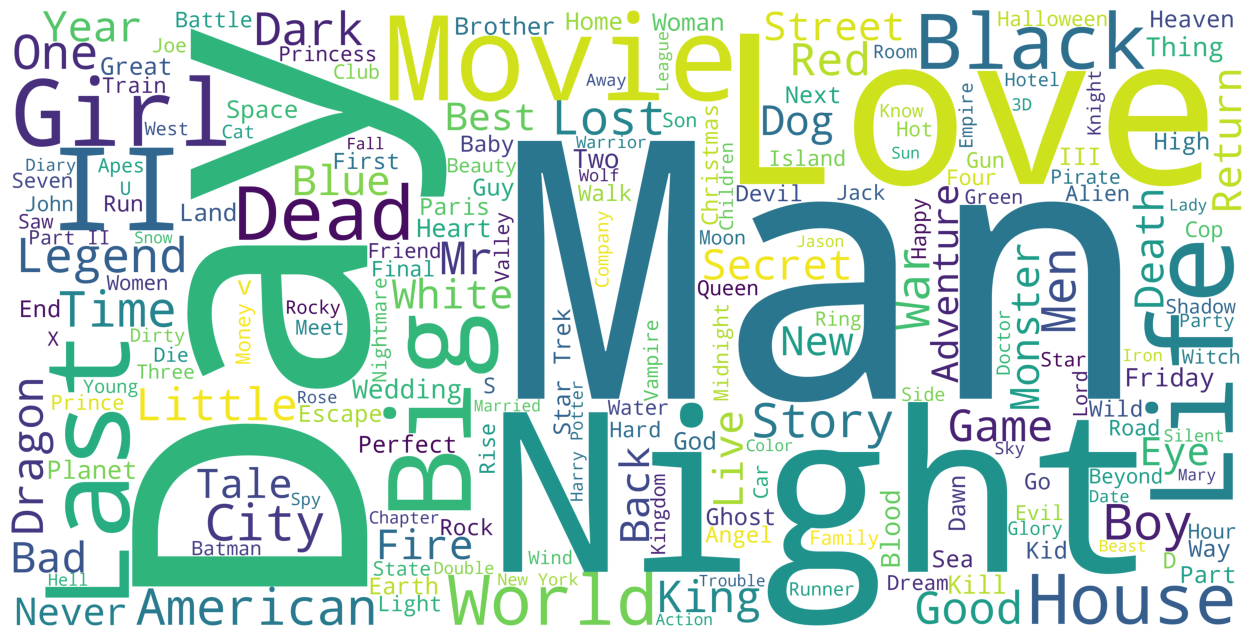

In [14]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

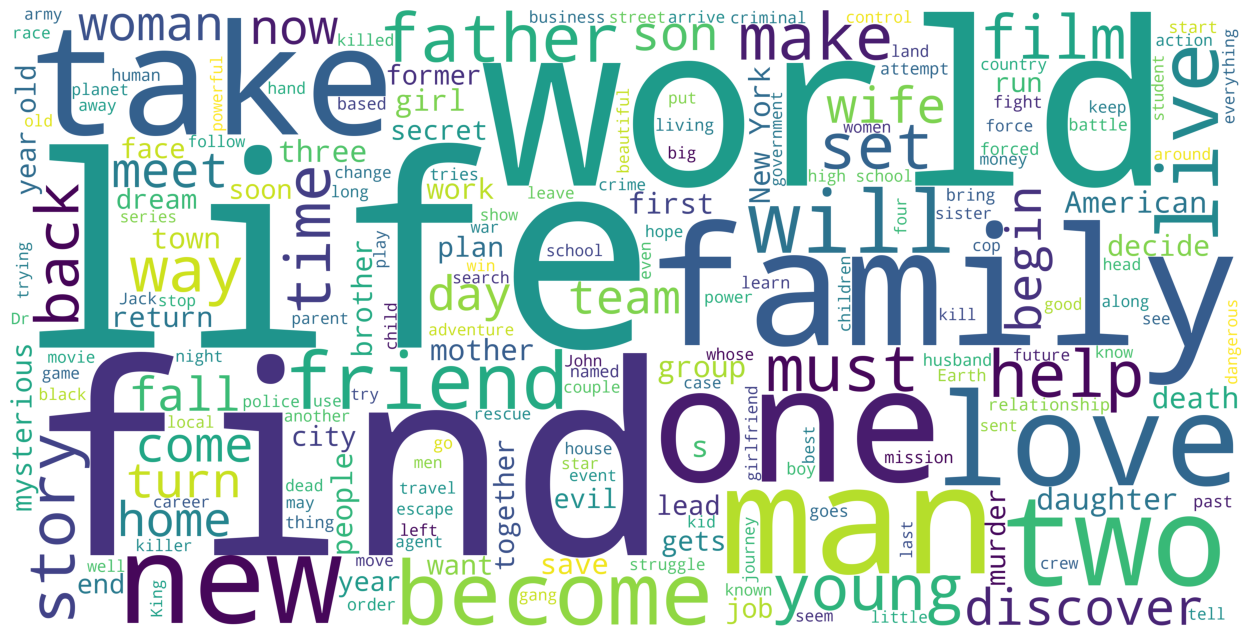

In [15]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

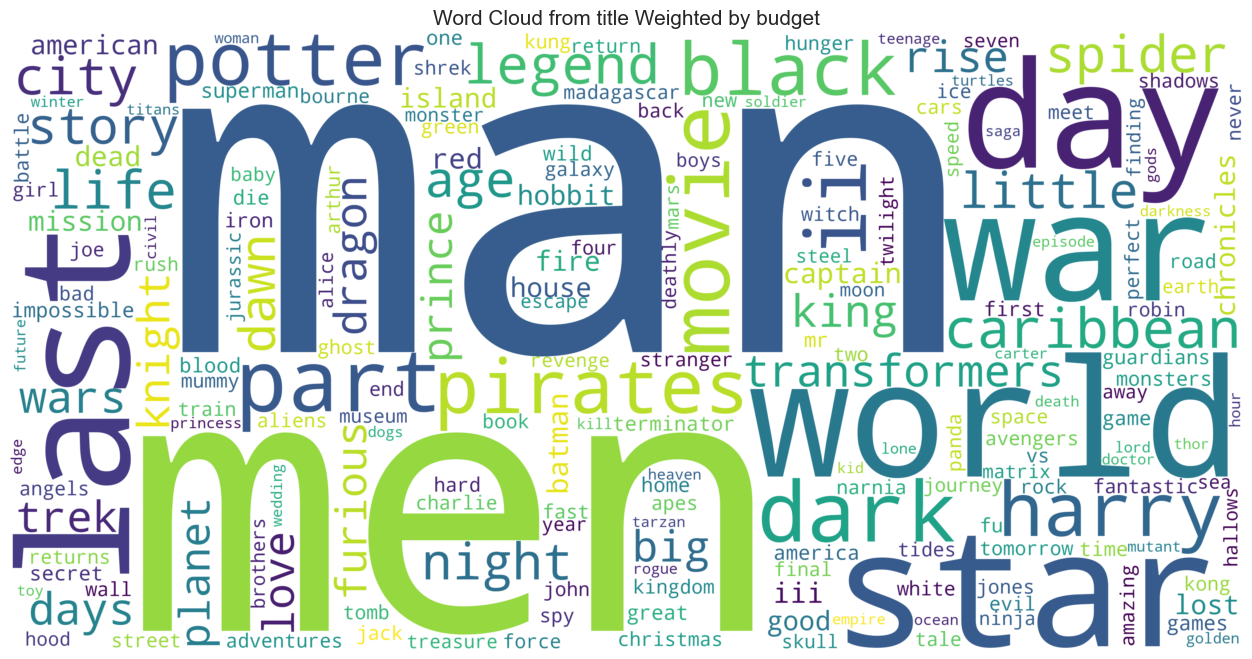

In [13]:
word_weights = defaultdict(float)
enhanced_stopwords = STOPWORDS.copy()
enhanced_stopwords.update([str(i) for i in range(10)])  # Add numbers 0-9
enhanced_stopwords.update([chr(i) for i in range(65, 91)])  # Add uppercase letters A-Z
enhanced_stopwords.update([chr(i) for i in range(97, 123)])  # Add lowercase letters a-z

for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['budget']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'budget'}')
plt.show()



## Genre

## Visualizations

## Discussion

## Contributions